Wine quality Linear Regression Model

Importing all required Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
data = pd.read_csv("winequality-red.csv",delimiter=";")

Finding correlation between attributes

In [3]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Plotting the graph of the correlation matrix

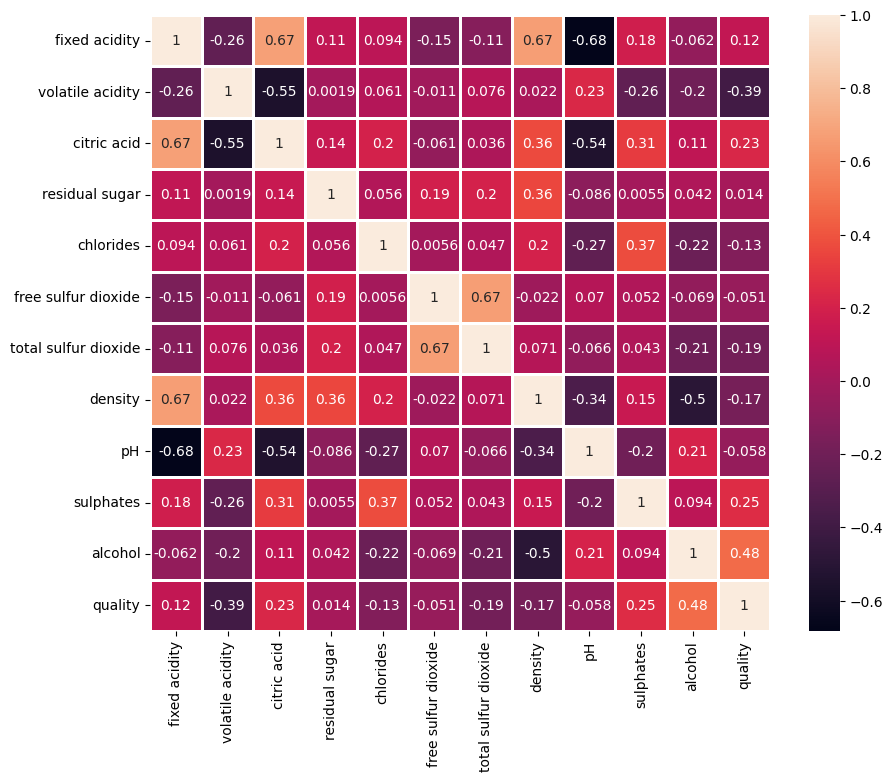

In [4]:
fig = plt.subplots(figsize=(10,8))
ax = sns.heatmap(data.corr(), annot=True, linewidths=2)

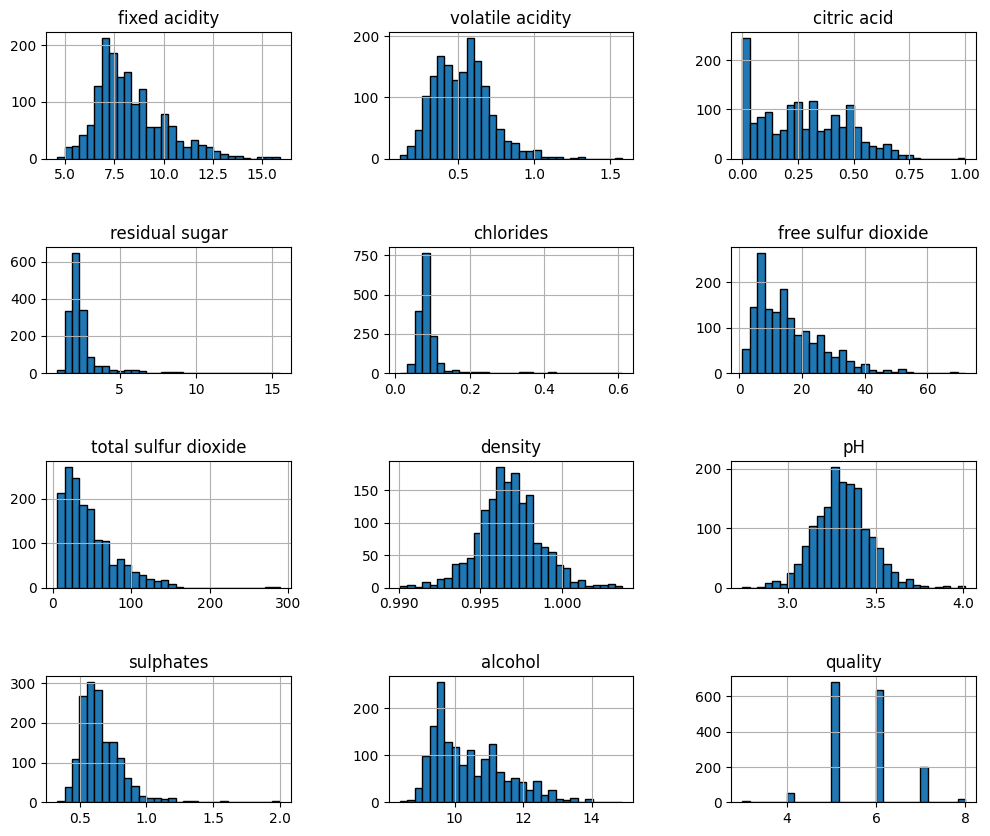

In [6]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Removing Redundant attributes (free sulfur dioxide, pH, residual sugar)

In [74]:
# all in 

y= data['quality']
X = data.drop(['quality',"free sulfur dioxide",'pH','residual sugar'],axis = 1)
sc=StandardScaler()
X=sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [75]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

Applying Linear Regression Model

In [81]:
# reg = LinearRegression().fit(X_train,Y_train)
reg = SGDRegressor().fit(X_train,Y_train)

In [82]:
reg.coef_

array([ 0.10181109, -0.21198018, -0.0164699 , -0.09055484, -0.06086904,
       -0.03968123,  0.14801784,  0.26440238])

In [83]:
y_pred = reg.predict(X_test)

In [84]:
print(mean_squared_error(Y_test,y_pred))

0.4066791723879163


Plotting the Linear Regression

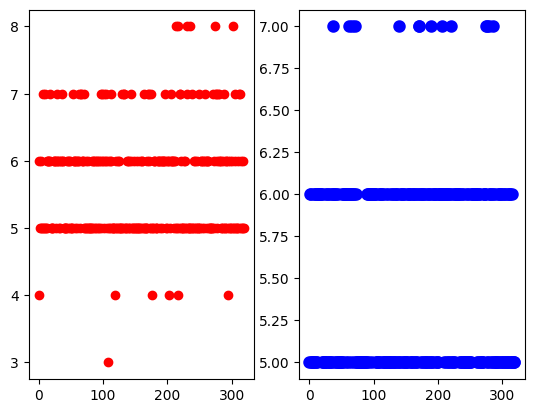

In [85]:
X = [i for i in range(320)]
ny_pred = [round(i) for i in y_pred]
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X,Y_test,color="red")
plt.subplot(1,2,2)
plt.scatter(X,ny_pred,color="blue",linewidth=3)
plt.show()

____________________________________________________________________________________________________________________________________________________________

Linear Regression Model from scratch

In [12]:
data = pd.read_csv("wineDataset/winequality-red.csv",delimiter=";")
y= data['quality']
X = data.drop(['quality',"free sulfur dioxide",'pH','residual sugar'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
def djdw(x,y,y_pred):
    res = 0
    for i in range(len(x)):
        res += x[i]*(y_pred[i]-y[i])
    return res/len(x)

def djdb(y,y_pred):
    res = 0
    for i in range(len(y)):
        res+= y_pred[i]-y[i]
    return res/len(y)

# returns y_predicted
def predict(x,w,b):
    res = 0
    y_pred = []
    for i in range(len(x)):
        res = 0
        for j,a in enumerate(x[i]):
            res+= w[j]*a
        res+= b
        y_pred.append(res)
    return y_pred

def error(y,y_pred):
    res = 0
    for i in range(len(y)):
        res+=(y_pred[i]-y[i])**2
    return res/len(y)

def gradientDescent(x,y,iterations, learning_rate):
    x = x.to_numpy()
    y = y.to_numpy()
    print(x)
    w = [0]*len(x[0])
    b = 0 
    for _ in range(iterations):
        y_pred = predict(x,w,b)
        w = w - learning_rate*djdw(x,y,y_pred)
        b = b - learning_rate*djdb(y,y_pred)
   

        

In [13]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
870,7.7,0.715,0.01,0.064,43.0,0.99371,0.57,11.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
45,4.6,0.520,0.15,0.054,65.0,0.99340,0.56,13.1
780,7.0,0.570,0.00,0.190,45.0,0.99676,0.60,9.4
976,7.2,0.410,0.30,0.083,72.0,0.99700,0.52,9.4


In [17]:
gradientDescent(X_train,Y_train,10000,0.01)

[[7.7000e+00 7.1500e-01 1.0000e-02 ... 9.9371e-01 5.7000e-01 1.1800e+01]
 [1.1200e+01 2.8000e-01 5.6000e-01 ... 9.9800e-01 5.8000e-01 9.8000e+00]
 [4.6000e+00 5.2000e-01 1.5000e-01 ... 9.9340e-01 5.6000e-01 1.3100e+01]
 ...
 [8.9000e+00 8.4000e-01 3.4000e-01 ... 9.9554e-01 4.8000e-01 9.1000e+00]
 [1.2800e+01 3.0000e-01 7.4000e-01 ... 9.9940e-01 7.7000e-01 1.0800e+01]
 [6.9000e+00 5.1000e-01 2.3000e-01 ... 9.9438e-01 8.4000e-01 1.1200e+01]]


C:\Users\samya\AppData\Local\Temp\ipykernel_48516\3283010492.py:8: RuntimeWarning: overflow encountered in add
  res += x[i]*(y_pred[i]-y[i])
C:\Users\samya\AppData\Local\Temp\ipykernel_48516\3283010492.py:8: RuntimeWarning: invalid value encountered in multiply
  res += x[i]*(y_pred[i]-y[i])
C:\Users\samya\AppData\Local\Temp\ipykernel_48516\3283010492.py:43: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate*djdw(x,y,y_pred)


In [18]:
y_pred

array([5.05103263, 5.75869448, 5.09123527, 6.38559157, 5.24874087,
       4.95927971, 5.19239215, 6.40430933, 5.84637517, 5.31851966,
       6.27772092, 5.15086408, 5.08097341, 5.88271026, 5.89899671,
       5.6138    , 6.4306593 , 5.88215072, 5.99238517, 5.70343901,
       5.10213945, 5.30544144, 4.98804979, 5.21545583, 6.21470192,
       5.32061094, 5.27339205, 5.39921632, 5.98214196, 6.39769437,
       5.38077853, 5.32695313, 5.71854839, 5.18102052, 5.36001252,
       5.92367329, 6.53661841, 5.92933835, 5.17750989, 5.56637689,
       5.81264303, 5.29373116, 5.50810908, 5.18734546, 6.21648559,
       5.46613048, 5.24951272, 5.05103263, 5.45514825, 5.13565479,
       6.15294365, 5.42473243, 5.01745159, 5.66303997, 6.05144989,
       5.65685192, 5.75523654, 5.24518323, 6.12869753, 6.15555092,
       5.23830277, 5.7737545 , 6.63410448, 6.48992702, 5.40139141,
       6.37551129, 6.54723709, 5.64752226, 5.57508811, 5.63649365,
       5.20162056, 6.67370629, 5.57046234, 5.31376785, 5.43215

In [19]:
mean_squared_error(Y_test,y_pred)

0.40325963490995037